In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [49]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


- Data has been read correctly 

In [50]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

- Personal loan is a binary categorical variable and is the Target variable in this case. 

In [51]:
data.shape

(5000, 14)

- At this stage, the data set contains 5000 data points with 14 attributes. Thus the data set contains 12 useful attributes as one is ID and one is Personal Loan (target)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [53]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- The info and the isna fuctions show that there are no null values or missing values in the data set


In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [55]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

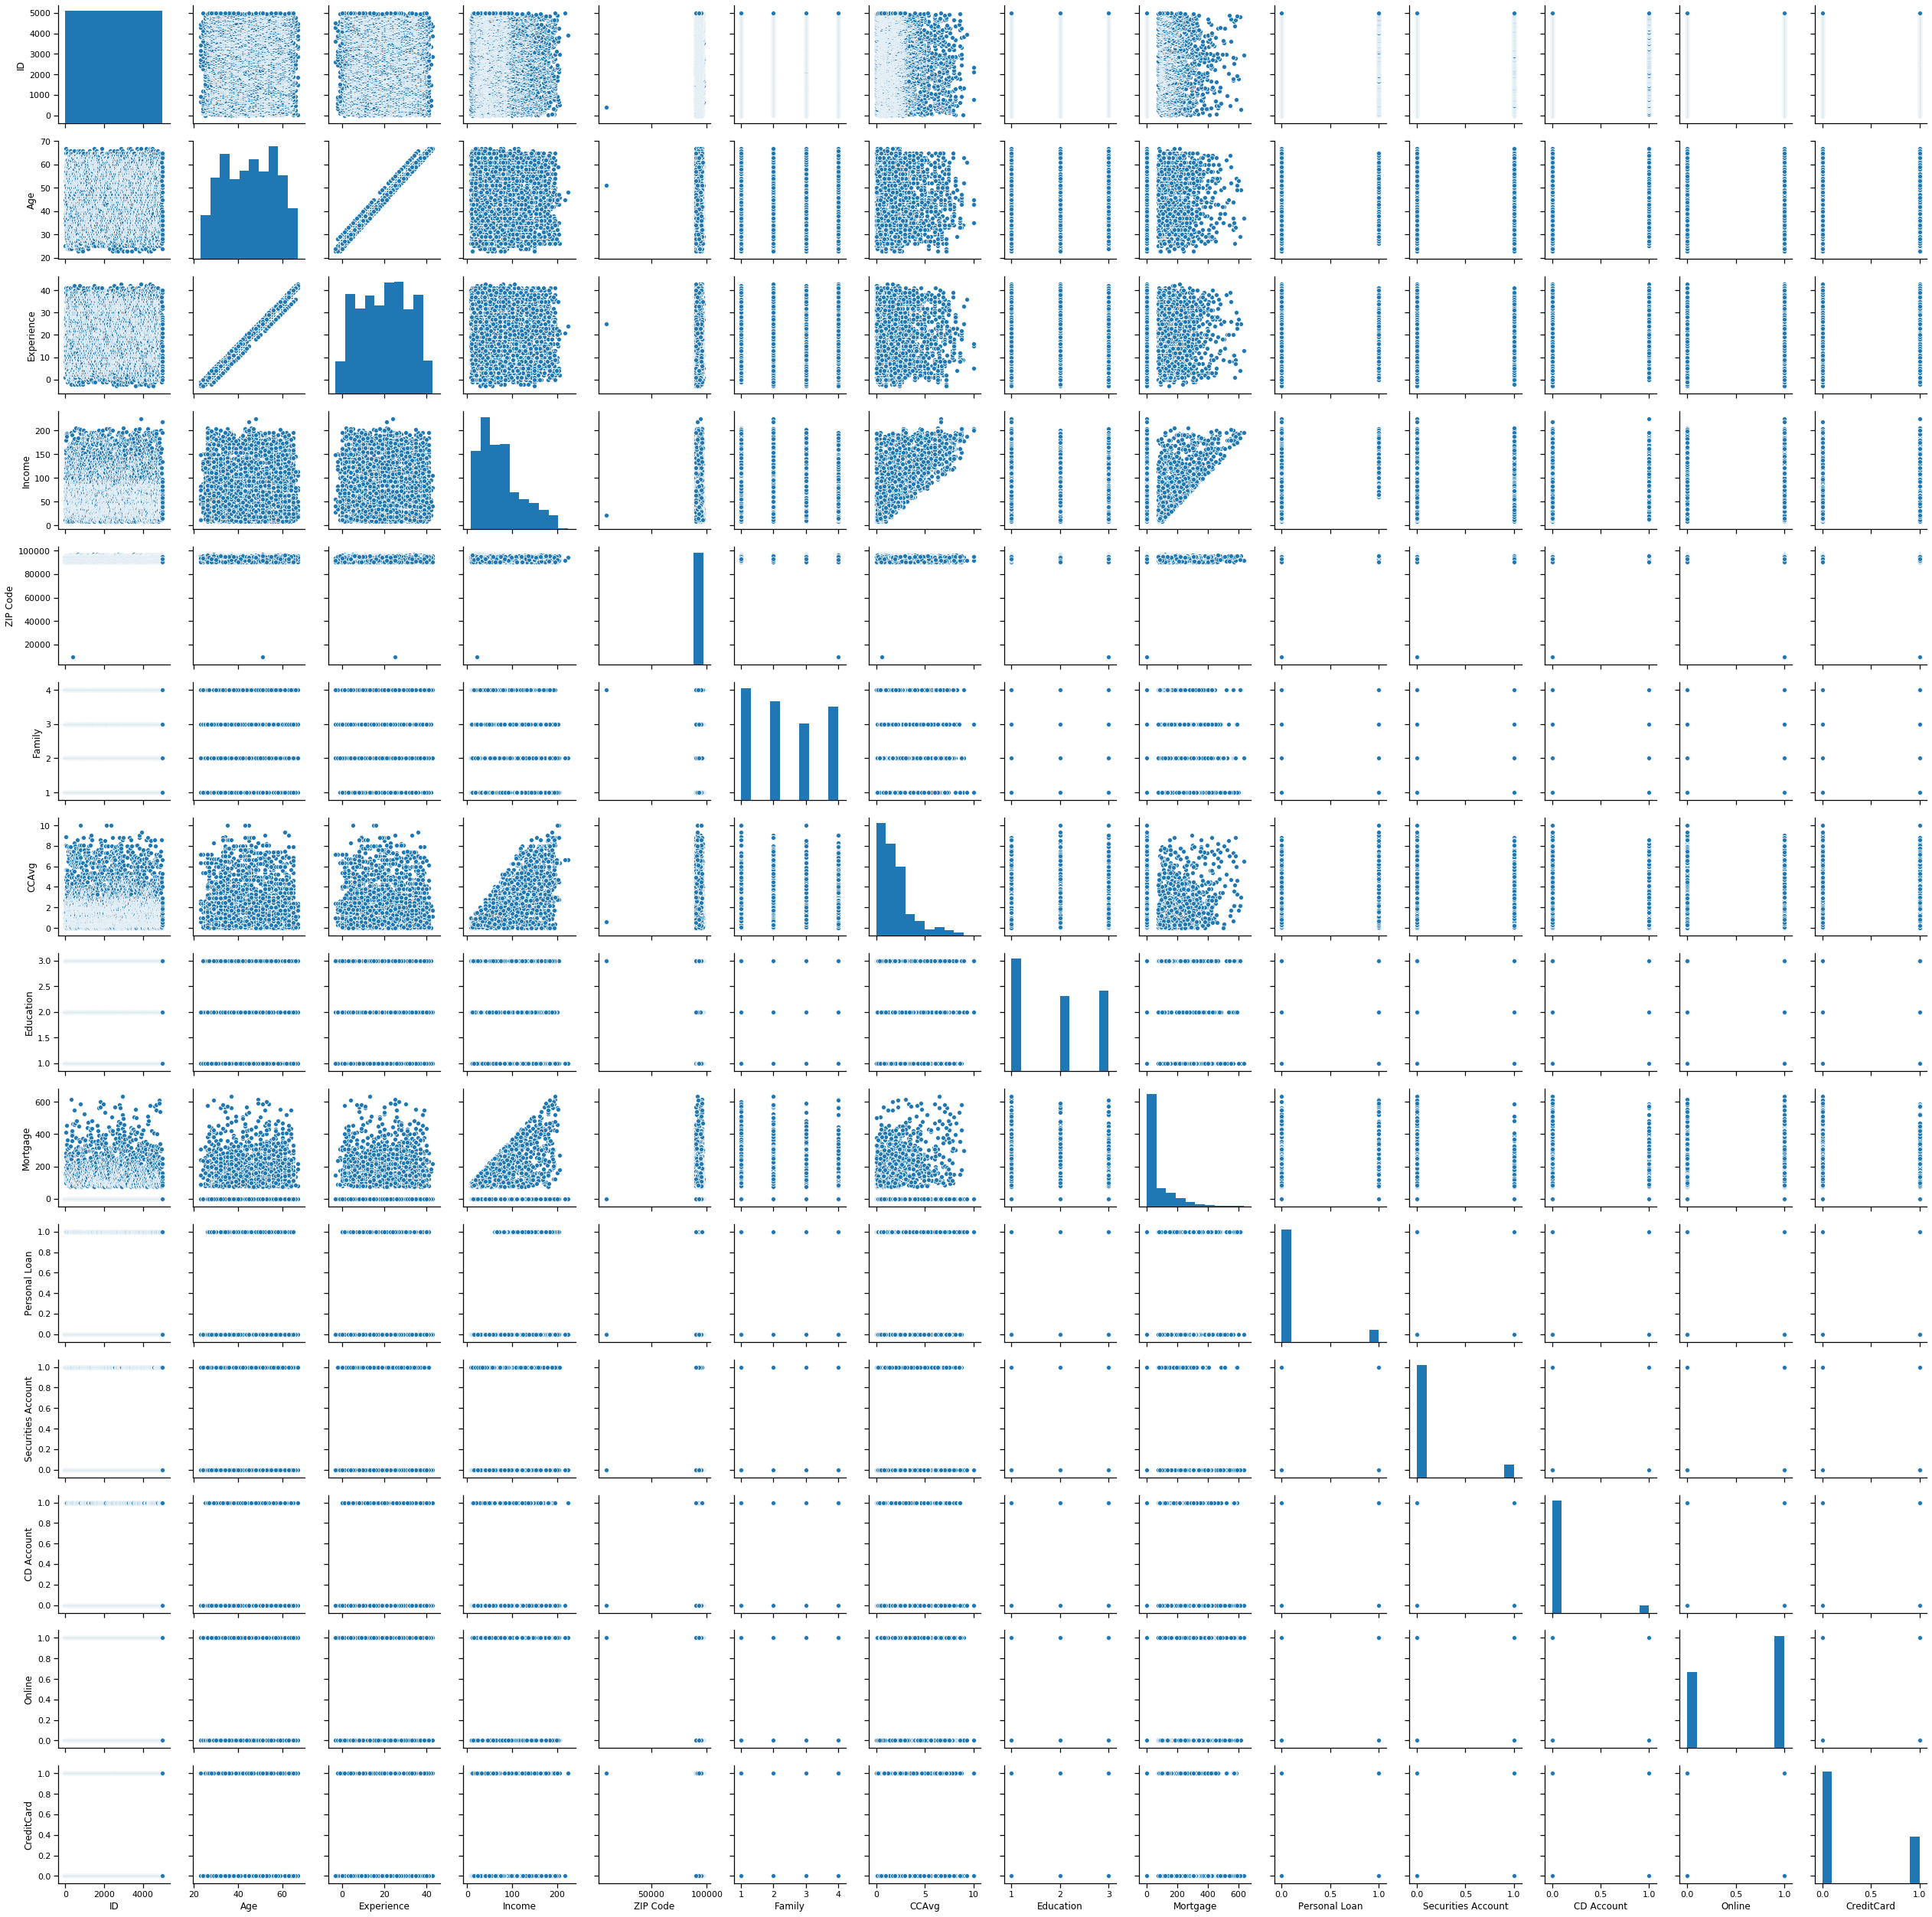

In [56]:
sns.pairplot(data)

- Age is a centrally distributed distribution. Mean is nearly equal to the mode. From the pair plot we can infer that it may not have any significant outliers.
- Age and Experience correlates well and any one can be removed
- The mean is equal to median for experience. 
- Income is positively skewed. 
- CCAvg is positively skewed variable. 
- Expereinece has negative value as seen from the describe table

In [57]:
print("The number of negatve entries in Experience is ",data[data['Experience'] < 0]['Experience'].count())

The number of negatve entries in Experience is  52


In [58]:
neg_exp = data[data['Experience']<0].index.astype('object')
len(neg_exp)

52

In [59]:
data.drop(neg_exp, inplace = True)

In [60]:
data.shape

(4948, 14)

- We can see here that 52 negative values have been removed from the dataset

In [61]:
data.describe()['Experience']

count    4948.000000
mean       20.331043
std        11.311973
min         0.000000
25%        10.750000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

- We see here that Experience now has no negative values

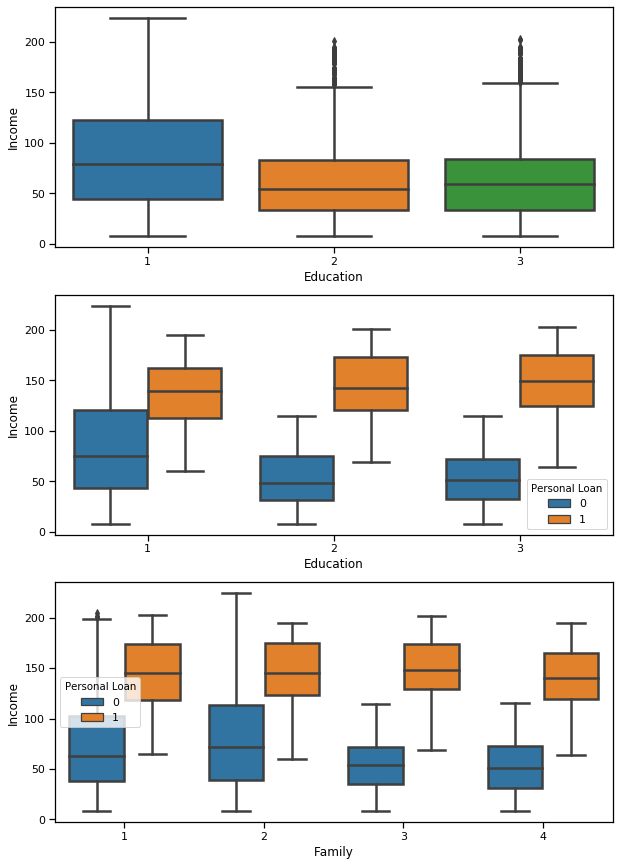

In [62]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10,15))
sns.boxplot(x='Education',y='Income',data=data, ax= axes[0]);
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data, ax = axes[1]);
sns.boxplot(x=data.Family,y=data.Income,hue=data['Personal Loan'], ax = axes[2]);
plt.show()

- The number of loan takers for each of the family sizes under cosideration seem to be same
- However, as a percentage value it is likely that people with family size of 3 have slightly higher likelyhood of taking a loan
- Peope who earn around 150 are more likely to take Personal Loan 

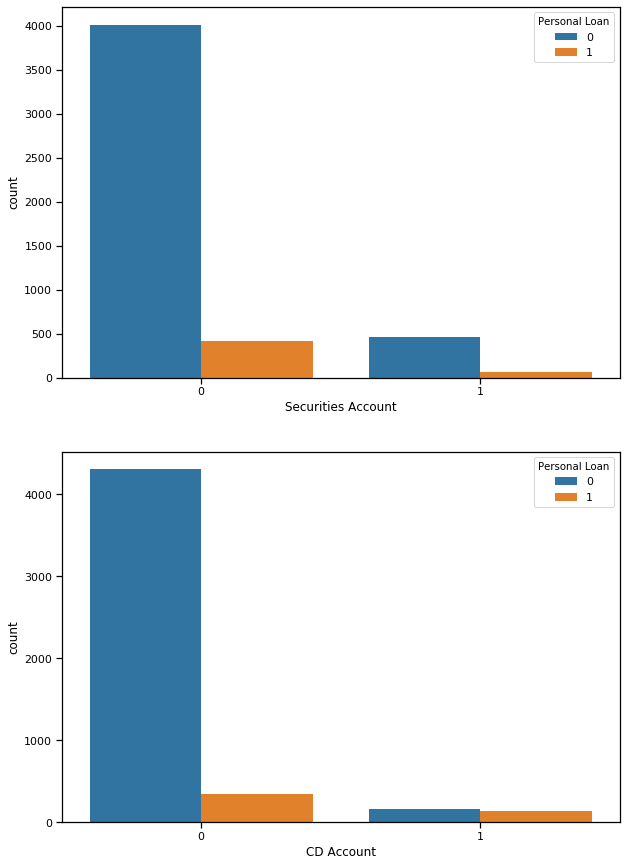

In [63]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,15))
sns.countplot(x="Securities Account", data=data,hue="Personal Loan", ax= axes[0]);
sns.countplot(x='CD Account',data=data,hue='Personal Loan', ax = axes[1])

- People who have CD account are equally distributed between people who have taken loan and people who have not
- However, most people who have no CD account have not taken a loan 

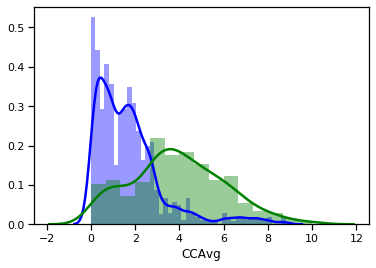

In [64]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'blue', label= 'No loan');
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'green', label = 'Loan');

- It seems that people who have taken loan have higher credit card average

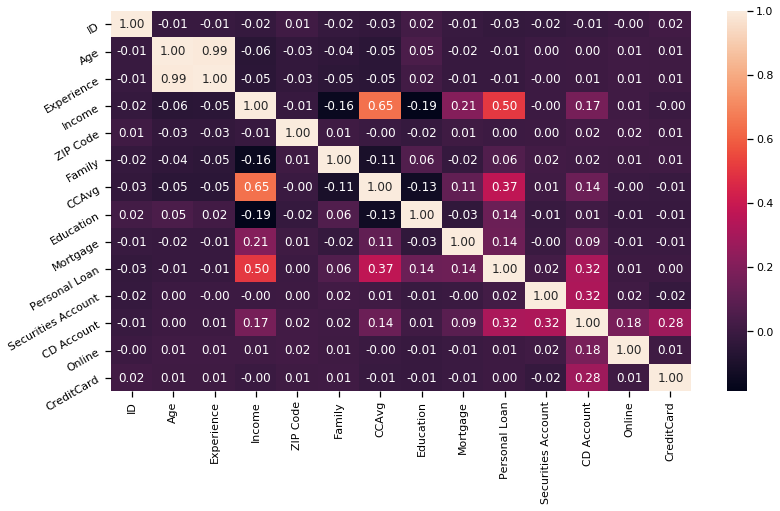

In [65]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = False
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

- Age and Experience have extremely high correlation 
- CCAvg and Income have correlation 
- CCAvg also has some correlation with Personal Loan

In [66]:
data_n = data[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()

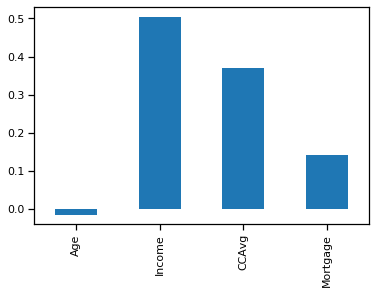

In [67]:
data_n.corr()['Personal Loan'][1:].plot.bar();

- 'Age' and 'Mortgage' both has very low correlation with Personal Loan. 
- We may say that only 'Income' and 'CCAvg' has association with 'Personal Loan'
- This inference is similar to the one we drew from the full correlation matrix

In [68]:
dataset = data[['Income', 'CCAvg', 'Family', 'Education', 'CD Account', 'Personal Loan']].copy()

In [69]:
dataset.head(2)

,Income,CCAvg,Family,Education,CD Account,Personal Loan
0,49,1.6,4,1,0,0
1,34,1.5,3,1,0,0


In [70]:
education_loan = dataset[dataset['Personal Loan'] == 1]['Education'].value_counts()
education_loan

3    205
2    182
1     93
Name: Education, dtype: int64

- Highest number of personal loan taken is seen to be in education category 3
- Lowest is in education categorry 1

In [71]:
edu_no_loan = dataset[dataset['Personal Loan'] == 0]['Education'].value_counts()
edu_no_loan

1    1987
3    1276
2    1205
Name: Education, dtype: int64

- Here we see that education 1 has highest number of people who have not taken loan 
- There is very little difference between catgory 2 and 3
- It will be good to study the proportions here

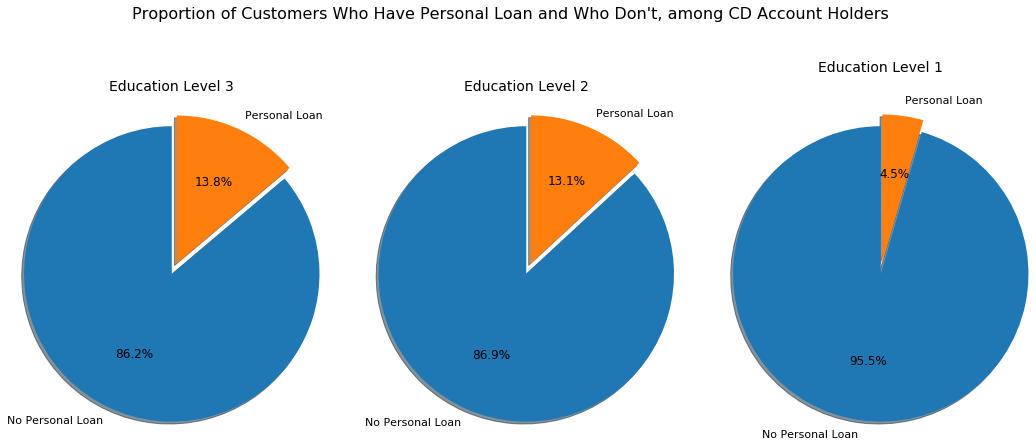

In [72]:
edu_3 = dataset[dataset['Education'] == 3]['Personal Loan'].value_counts()
edu_2 = dataset[dataset['Education'] == 2]['Personal Loan'].value_counts()
edu_1 = dataset[dataset['Education'] == 1]['Personal Loan'].value_counts()
labels = ['No Personal Loan','Personal Loan']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,6),subplot_kw=dict(aspect="equal"))
plt.axis('equal')
ax1.pie(edu_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Education Level 3',fontsize = 14, y = 1.1)

ax2.pie(edu_2, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Education Level 2', fontsize = 14, y = 1.1)

ax3.pie(edu_1, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90);
ax3.set_title('Education Level 1',fontsize = 14, y = 1.1)

plt.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, among CD Account Holders', \
             fontsize = 16, y = 1.12);

- Contrary to what we saw with the absolute numbers when we look at the proportions we see that education category 1 has lowest proportion of Personal Loan takers
- Catgory 2 and 3 have similar proportion of loan takers

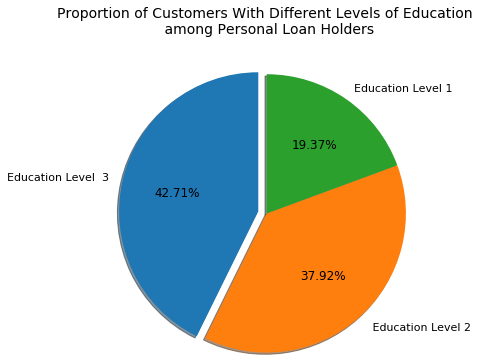

In [73]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Education Level  3',' Education Level 2','Education Level 1']
plt.pie(education_loan, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_among_PL.png', bbox_inches = 'tight');

- Here it is seen that among the people who have taken loan, level 1 has lowest proportion and level 3 has highest
- Although, level 2 has proportion very close to level 3
- Thus education is a good variable to keep track in the model

In [74]:
data.drop('ZIP Code', axis = 1,inplace = True)


- ID is a vatiable which does not add any value to the data set. Hence it is removed
- Age and Experience are also highly correlated. It is good to remove one of them
- Experience is removed. 

In [75]:
data.drop('ID', axis = 1, inplace = True)
data.drop('Experience', axis =1, inplace = True)

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.0,46.0,55.0,67.0
Income,4948.0,73.814470,46.112596,8.0,39.0,64.0,98.0,224.0
Family,4948.0,2.391471,1.148444,1.0,1.0,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.7,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.0,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.0,0.0,101.0,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.0,0.0,0.0,1.0
Securities Account,4948.0,0.104285,0.305660,0.0,0.0,0.0,0.0,1.0
CD Account,4948.0,0.061035,0.239418,0.0,0.0,0.0,0.0,1.0
Online,4948.0,0.597009,0.490549,0.0,0.0,1.0,1.0,1.0


data.isna().sum()

In [78]:
data_1=data

## Creating the target variable (y) and the features (X)

In [79]:
X = data.drop('Personal Loan', axis = 1)
y = data['Personal Loan']

In [80]:
X.shape

(4948, 10)

In [81]:
y.shape

(4948,)

- It is seen that there are 4948 records 
- 10 features are present in the feature set (X)

## KNN

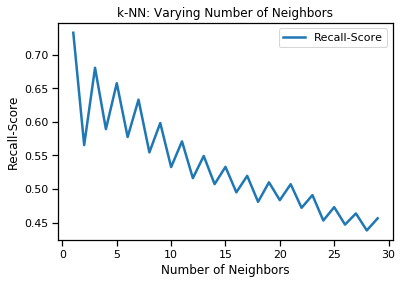

In [82]:

neighbors = np.arange(1, 30)
rec_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    rec = []
    
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        conf = confusion_matrix(y_test, predicted)
        precision = conf[1,1]/(conf[1,1]+conf[0,1])
        recall = conf[1,1]/(conf[1,1]+conf[1,0])
        rec.append(recall)
        #f1_score = 2*precision*recall/(precision + recall)
        #f1.append(f1_score)
        
    #Compute fn
    rec_plot[i] = np.mean(rec)
   
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, rec_plot, label = 'Recall-Score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall-Score')
plt.show()

- Optimum n-neighbours is found to be 3


In [83]:
x_training_data = pd.DataFrame(scaledX_train, columns=X.columns)
x_testing_data = pd.DataFrame(scaledX_test, columns=X.columns)

- For n=3 we find the best combination of features for the model
- We use all 10 variables to start off 

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = sfs(knn, k_features = 10, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)



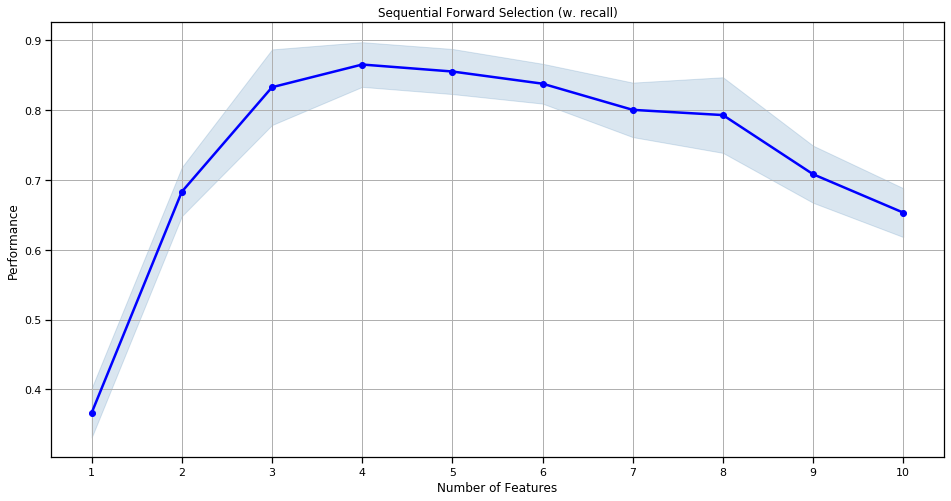

In [85]:


fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()

- From the above plot it is seen that the best feature set contains 4 features


In [86]:
sfs1 = sfs(knn, k_features = 4, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 3, 4]
['Income', 'Family', 'CCAvg', 'Education']


- The 4 best features are Income, Family  CCAvg and Education


In [87]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
knn.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = knn.predict(x_training_data[subsetColumnList])
y_test_pred = knn.predict(x_testing_data[subsetColumnList])
dat = [[knn.score(x_training_data[subsetColumnList], y_train), recall_score(y_train_pred, y_train), f1_score(y_train_pred, y_train)], [knn.score(x_testing_data[subsetColumnList], y_test),recall_score(y_test_pred, y_test), f1_score(y_test_pred, y_test)]]
indexes = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score', 'Recall Score']
df_score_knn = pd.DataFrame(dat,index = indexes, columns = cols)



In [88]:
df_score_knn.T

,Training,Testing
Accuracy,0.990399,0.981818
f1-Score,0.989218,0.942029
Recall Score,0.950777,0.878378


- The above table shows the accuracy of 0.99 (training) and 0.98 (testing) has been achieved with KNN
- The recall score is 0.95 (training) and 0.87(testing)
- The f1-score is 0.98 (training) and 0.94 (testing)

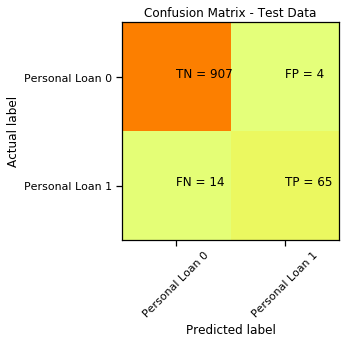

In [89]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

- The confusion matrix shows that number of false negatives is 14
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 4  
- False positives are less serious in this case

##### Preparing data for the ROC curve that will be used to compare the different models

In [90]:
y_pred_prob = knn.predict_proba(x_testing_data[subsetColumnList])[:, 1]

In [91]:
len(y_pred_prob)

990

In [92]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob)

- Calculating the AUC

In [93]:
auc_knn = roc_auc_score(y_test, y_pred_prob)

In [94]:
auc_knn

0.9605524600869819

- We see that the AUC for this KNN model is 0.96

## LOGISTIC REGRESSION

- Performing feature selection for logistic regression model
- Here we donot need to split the data again as we are using the same scaled and split data used for KNN

In [95]:
lr = LogisticRegression()
sfs1 = sfs(lr, k_features = 10, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)



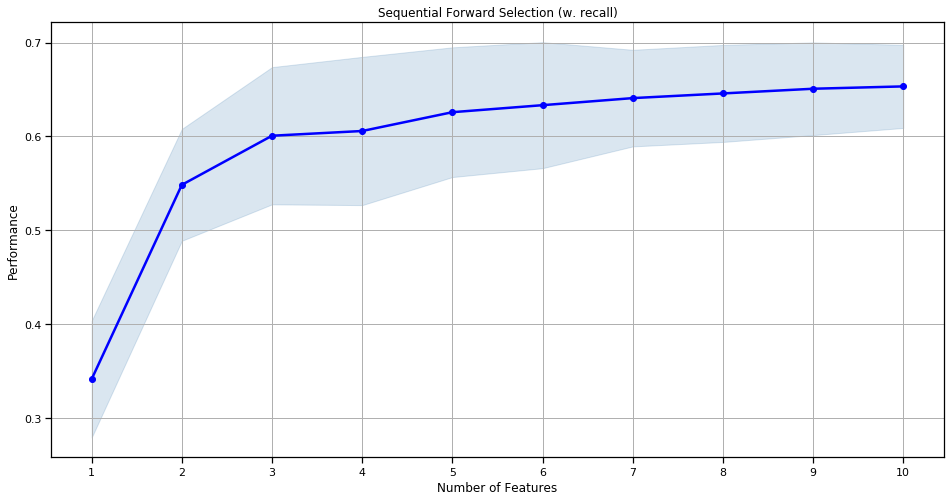

In [96]:

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()

- From the above plot it is seen that 6 or 7 is the optimum number of features
- Next step is to find the 6 combined features which gives best result

In [97]:
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 4, 7, 8, 9]
['Income', 'Family', 'Education', 'CD Account', 'Online', 'CreditCard']


- We see the most important features for Logistic regression are 'Income', 'Family', 'Education', 'CD Account', 'Online', 'CreditCard'

In [98]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
lr.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = lr.predict(x_training_data[subsetColumnList])
y_test_pred = lr.predict(x_testing_data[subsetColumnList])
dat = [[lr.score(x_training_data[subsetColumnList], y_train), f1_score(y_train_pred, y_train), recall_score(y_train_pred, y_train)], [lr.score(x_testing_data[subsetColumnList], y_test),f1_score(y_test_pred, y_test),recall_score(y_test_pred, y_test)]]
indexes = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score', 'Recall Score']
df_score_lr = pd.DataFrame(dat,index = indexes, columns = cols)

In [99]:
df_score_lr.T

,Training,Testing
Accuracy,0.950480,0.949495
f1-Score,0.724719,0.652778
Recall Score,0.829582,0.723077


- The above table shows the accuracy of 0.95 (training) and 0.95 (testing) has been achieved with KNN
- The f1 score is 0.72 (training) and 0.65(testing)
- The recall score is 0.82 for training and 0.72 for testing

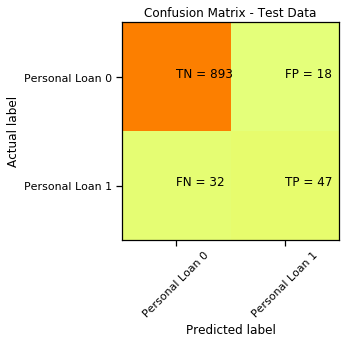

In [100]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

- The confusion matrix shows that number of false negatives is 32
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 18  
- False positives are less serious in this case

##### Calculating the values for ROC

In [101]:
y_pred_prob = lr.predict_proba(x_testing_data[subsetColumnList])[:, 1]

In [102]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob)

In [103]:
auc_lr = roc_auc_score(y_test, y_pred_prob)

In [104]:
auc_lr

0.961962789534383

- Cross Validated AUC Score is 0.96

## NAIVE BAYES

In [105]:
gnb = GaussianNB()

- Performing Feature Selection for Naive Bayes

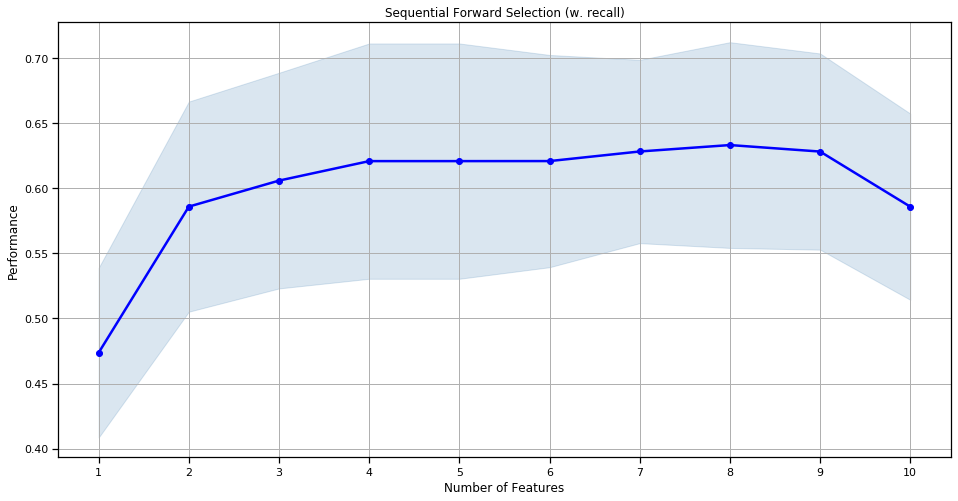

In [106]:
sfs1 = sfs(gnb, k_features = 10, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. recall)')
plt.grid()
plt.show()


- We see that the best number of features is 5
- Next step is to determine the 5 best features

In [107]:
sfs1 = sfs(gnb, k_features = 5, forward = True, scoring = 'recall', cv = 5)
sfs1 = sfs1.fit(x_training_data.values, y_train.values)
sfs1.get_metric_dict()
columnList = list(x_training_data.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[1, 2, 3, 5, 8]
['Income', 'Family', 'CCAvg', 'Mortgage', 'Online']


- The best combination of features for Naive Bayes is found to be 'Income', 'Family', 'CCAvg', 'Mortgage', 'Online'

In [108]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
gnb.fit(x_training_data[subsetColumnList], y_train)
y_train_pred = gnb.predict(x_training_data[subsetColumnList])
y_test_pred = gnb.predict(x_testing_data[subsetColumnList])
dat = [[gnb.score(x_training_data[subsetColumnList], y_train), f1_score(y_train_pred, y_train), recall_score(y_train_pred, y_train)], [gnb.score(x_testing_data[subsetColumnList], y_test),f1_score(y_test_pred, y_test), recall_score(y_test_pred, y_test)]]
indexes = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score','Recall Score']
df_score_gnb = pd.DataFrame(dat,index = indexes, columns = cols)

In [109]:
df_score_gnb.T

,Training,Testing
Accuracy,0.893380,0.889899
f1-Score,0.541304,0.423280
Recall Score,0.479769,0.363636


- The above table shows the accuracy of 0.89 (training) and 0.88 (testing) has been achieved with Naive Bayes
- The f1 score is 0.54 (training) and 0.42(testing)
- The recall score is 0.47 (training) and 0.36 (testing)

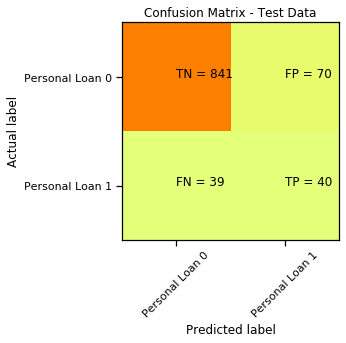

In [110]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Personal Loan 0','Personal Loan 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

- The confusion matrix shows that number of false negatives is 39
- The false negative is of great importance here is because the bank does not want to miss targetting their compaign to someone who islikely to take Personal Loan
- False positives are 70 
- False positives are less serious in this case

##### Calculating paramters for ROC curve

In [111]:
y_pred_prob = gnb.predict_proba(x_testing_data[subsetColumnList])[:, 1]

In [112]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_prob)

In [113]:
auc_gnb = roc_auc_score(y_test, y_pred_prob)
auc_gnb

0.9199099612333087

- The AUC score is 0.92

## Summary

In [114]:
data_summary = [[df_score_knn.loc['Training','Accuracy'], df_score_lr.loc['Training', 'Accuracy'], df_score_gnb.loc['Training','Accuracy']],[df_score_knn.loc['Testing','Accuracy'], df_score_lr.loc['Testing', 'Accuracy'], df_score_gnb.loc['Testing','Accuracy']],[df_score_knn.loc['Training','f1-Score'], df_score_lr.loc['Training', 'f1-Score'], df_score_gnb.loc['Training','f1-Score']],[df_score_knn.loc['Testing','f1-Score'], df_score_lr.loc['Testing', 'f1-Score'], df_score_gnb.loc['Testing','f1-Score']],[df_score_knn.loc['Training','Recall Score'], df_score_lr.loc['Training', 'Recall Score'], df_score_gnb.loc['Training','Recall Score']],[df_score_knn.loc['Testing','Recall Score'], df_score_lr.loc['Testing', 'Recall Score'], df_score_gnb.loc['Testing','Recall Score']],[auc_knn,auc_lr,auc_gnb]]
metrc = ['Training Accuracy', 'Testing Accuracy', 'Training f1-Score', 'Testing f1-Score', 'Training Recall Score', 'Testing Recall Score','AUC']
mods = ['KNN', 'Logistic Regression', 'Naive Bayes']
score_summary = pd.DataFrame(data_summary,index = metrc, columns = mods)
summary_stats = score_summary.T
summary_stats

,Training Accuracy,Testing Accuracy,Training f1-Score,Testing f1-Score,Training Recall Score,Testing Recall Score,AUC
KNN,0.990399,0.981818,0.989218,0.942029,0.950777,0.878378,0.960552
Logistic Regression,0.950480,0.949495,0.724719,0.652778,0.829582,0.723077,0.961963
Naive Bayes,0.893380,0.889899,0.541304,0.423280,0.479769,0.363636,0.919910


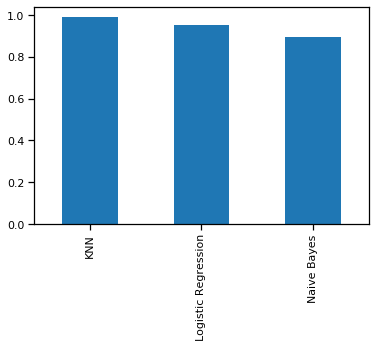

In [115]:
summary_stats['Training Accuracy'][0:].plot.bar();

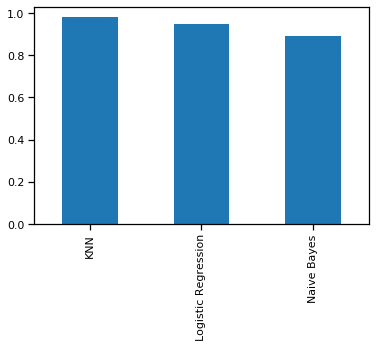

In [116]:
summary_stats['Testing Accuracy'][0:].plot.bar();

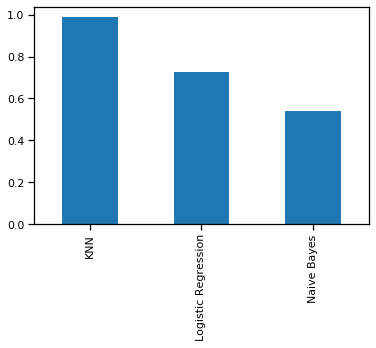

In [117]:
summary_stats['Training f1-Score'][0:].plot.bar();

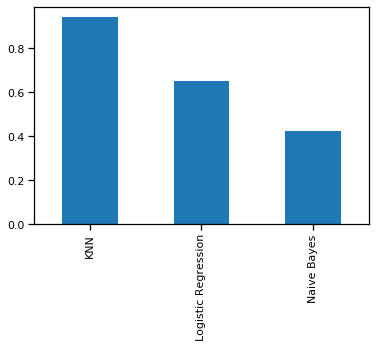

In [118]:
summary_stats['Testing f1-Score'][0:].plot.bar();

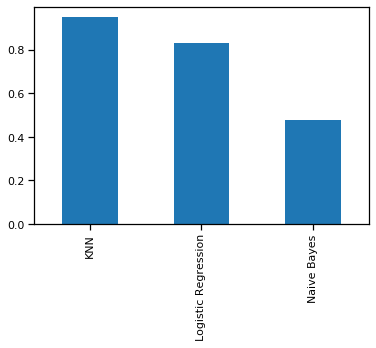

In [119]:
summary_stats['Training Recall Score'][0:].plot.bar();

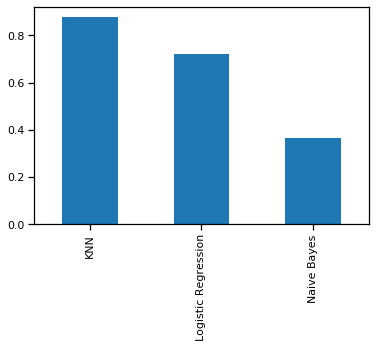

In [120]:
summary_stats['Testing Recall Score'][0:].plot.bar();

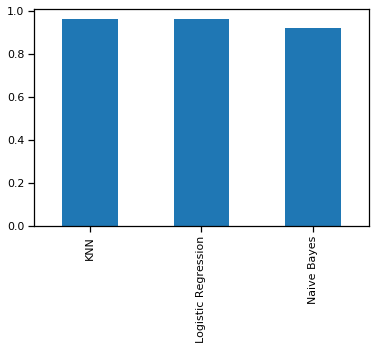

In [121]:
summary_stats['AUC'][0:].plot.bar();

- KNN with 3 neighbours has the highest recall, accuracy and AUC. Hence the model to be chosen is KNN. 
